In [1]:
from ipynb.fs.full.video_actions_v2 import *
from ipynb.fs.full.interact_with_app import *
from ipynb.fs.full.box_tool import *

In [2]:
_objecta_path = '../data/object_boxes'      
_poses_path = '../data/pose_boxes'   
_object_timestamps = get_keys_timestamps_directory(path=_objecta_path)
_pose_timestamps =get_keys_timestamps_directory(path=_poses_path)

In [3]:
# filenames sorted by time_seconds
def _order(x):
    return x.time_seconds

_key = list(_object_timestamps.keys())[1]
_pose_filenames = sorted(filter_filenames(list=list_filenames(path=_poses_path), key=_key),key=_order)
_object_filenames = sorted(filter_filenames(list=list_filenames(path=_objecta_path), key=_key),key=_order)

In [4]:
# get list with image filenames in directory
_images_path = '/home/jovyan/test/' + _key
_image_filenames = listdirectory(_images_path)

_image_timestamps=[]
for _filename in _image_filenames:
    _splits = _filename.split('_') 
    _ts2 = _splits[len(_splits)-3]
    _image_timestamps.append(_ts2)

In [5]:
#_time_seconds=_pose_timestamps[_key][3]
_time_seconds=_image_timestamps[3]
_pose_filenames_timestamp   = filter_filenames(list=_pose_filenames,  time_seconds=_time_seconds)
_object_filenames_timestamp = filter_filenames(list=_object_filenames, time_seconds=_object_timestamps[_key][0])

_poses = []
for _filename in _pose_filenames_timestamp:
    _poses = _poses + get_poses_for_filename(_poses_path,_filename)

In [6]:
# find image
_image_filename=None
for _filename in _image_filenames:
    _splits = _filename.split('_') 
    _ts2 = _splits[len(_splits)-3]
    #print(_time_seconds,_ts2)
    if float(_time_seconds) == float(_ts2):
        _image_filename = _filename
        
_image_path = filename=_images_path + '/' + _image_filename 

_image_path, _time_seconds        

('/home/jovyan/test/JqUREqYduHw/JqUREqYduHw_5_1640343624.0894485_Dec-24-11:00:24-2021_.png',
 '1640343624.0894485')

In [7]:
_pose_filenames_timestamp

In [8]:
_image_timestamps,_time_seconds

(['1640343901.2385988',
  '1640343660.6266232',
  '1640344020.6686954',
  '1640343624.0894485'],
 '1640343624.0894485')

In [9]:
_pose_filenames_timestamp[0].__dict__

{'time_seconds': 1640343624.0894485,
 'y': 5,
 'x': 2,
 'key': 'JqUREqYduHw',
 '_filename': 'JqUREqYduHw_Box_5_2_1640343624.0894485_Dec-24-12:00:24-2021.json'}

In [10]:
_objects = []
for _filename in _object_filenames_timestamp:
    _objects = _objects + get_objects_for_filename(_objecta_path,_filename)

# Examples

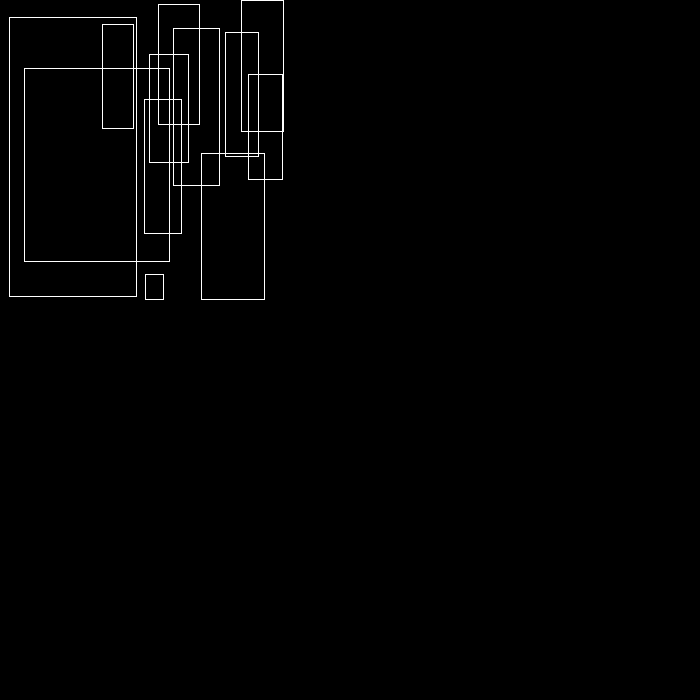

In [11]:
_image_tool = ImageTool(size=(700,700))

for index,_object in enumerate(_objects):
    _image_tool.drawBBox(_object.bbox)
    
_image_tool.image    

0 5 ((0, 900), (159, 1079))
4 4 ((640, 720), (799, 899))
0 4 ((0, 720), (159, 899))
8 3 ((1280, 540), (1439, 719))
7 3 ((1120, 540), (1279, 719))
6 3 ((960, 540), (1119, 719))
10 1 ((1600, 180), (1759, 359))


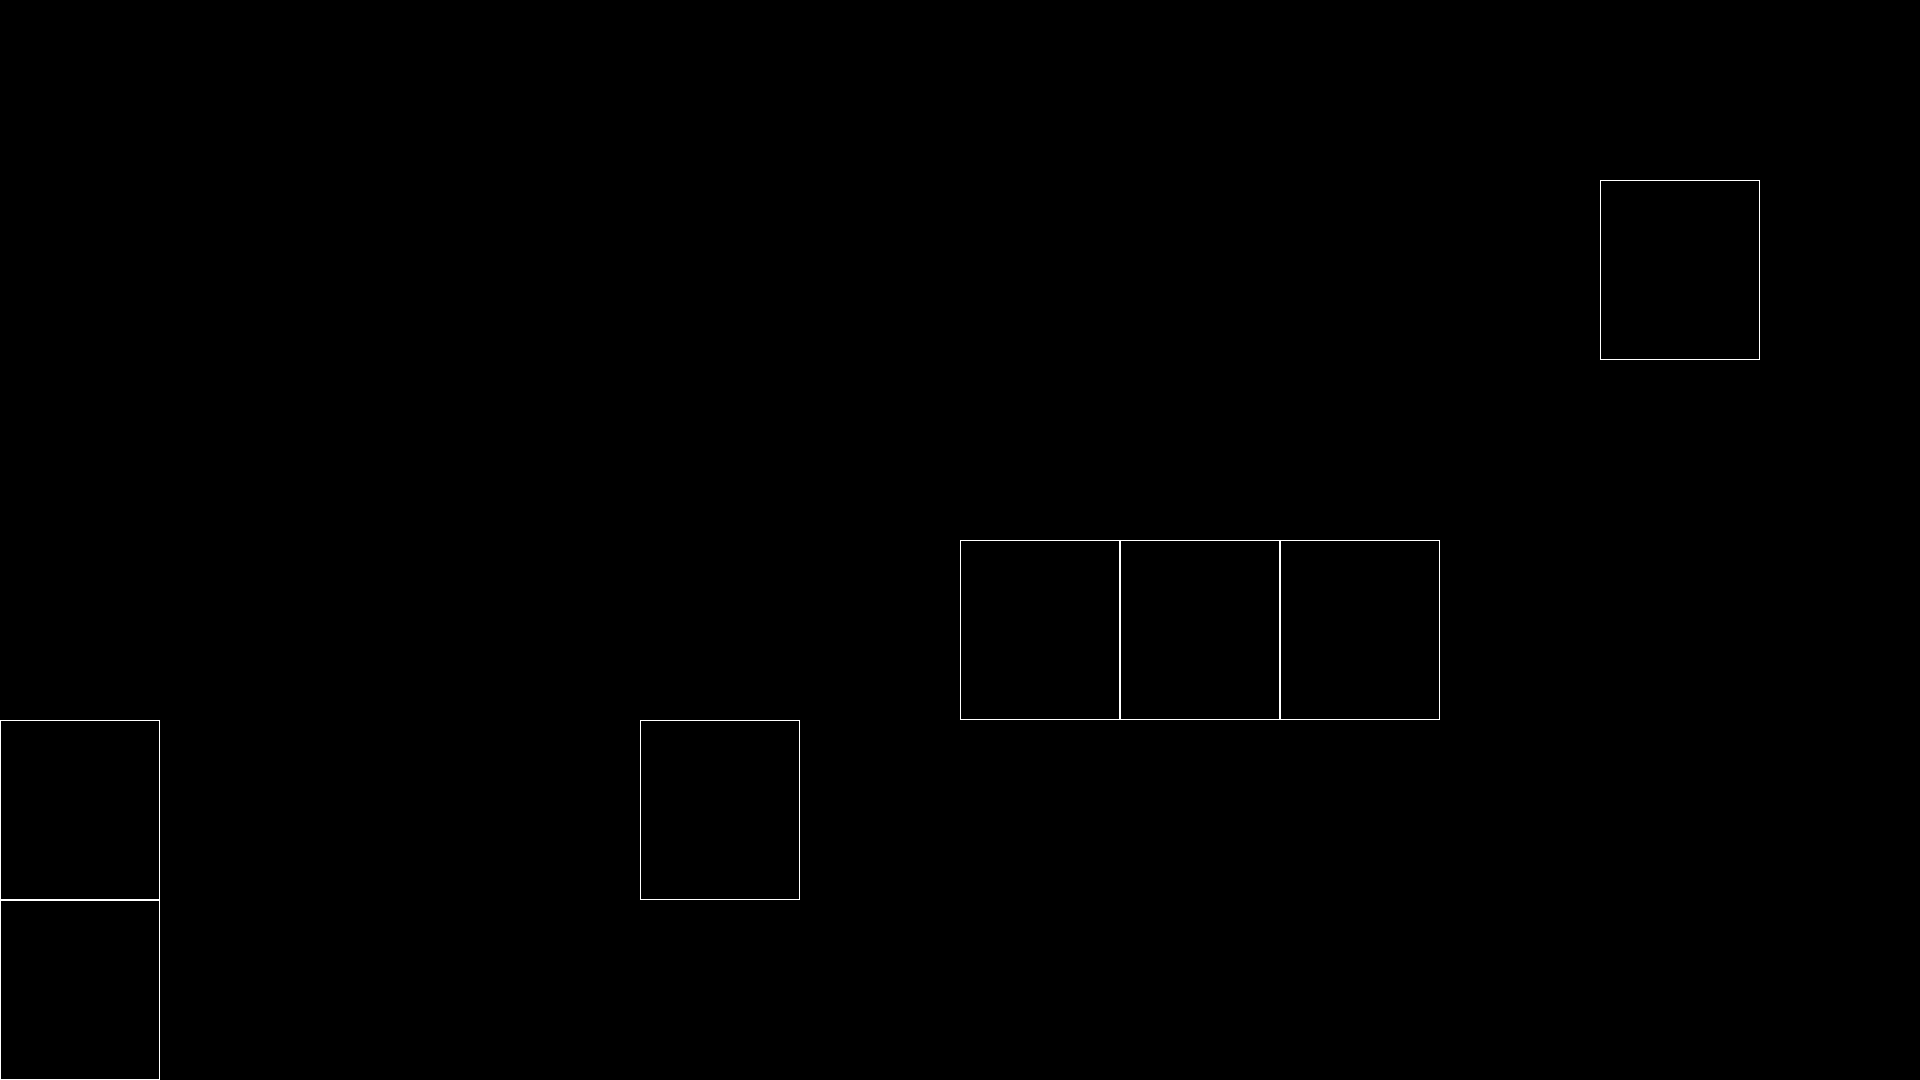

In [12]:
_image_tool = ImageTool(size=(1920,1080))
_filenames = _object_filenames_timestamp
for _filename in _filenames:
    bbox = box_to_bbox_world(_filename.x,_filename.y)
    _image_tool.drawBBox(bbox)
    print (_filename.x,_filename.y,box_to_bbox_world(_filename.x,_filename.y))
_image_tool.image            

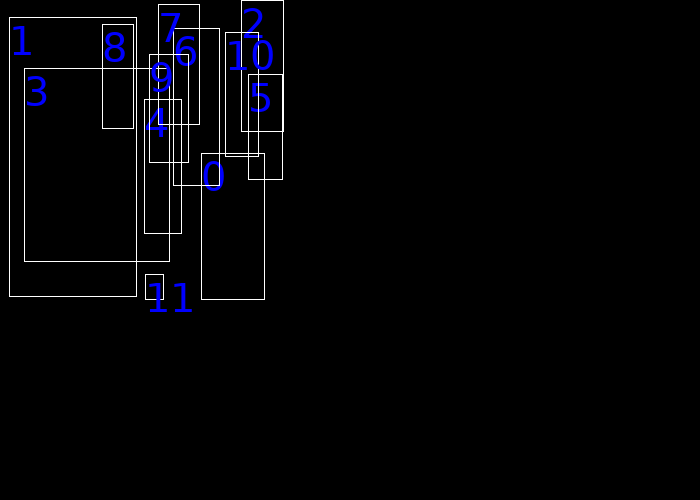

In [13]:
_image_tool = PoseImageTool(size=(700,500))

for index,_object in enumerate(_objects):
     add_object_to_image(_image_tool,_object,index)
    
_image_tool.image    

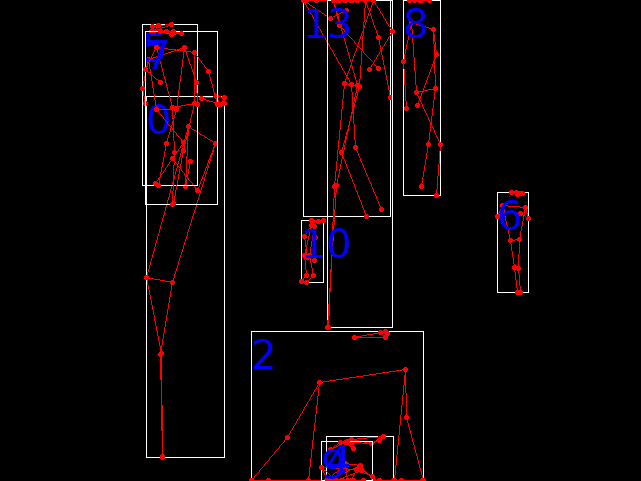

In [14]:
_image_tool = PoseImageTool(size=(641,481))

for index,_pose in enumerate(_poses):
     add_pose_to_image(_image_tool,_pose,index)
    
_image_tool.image    

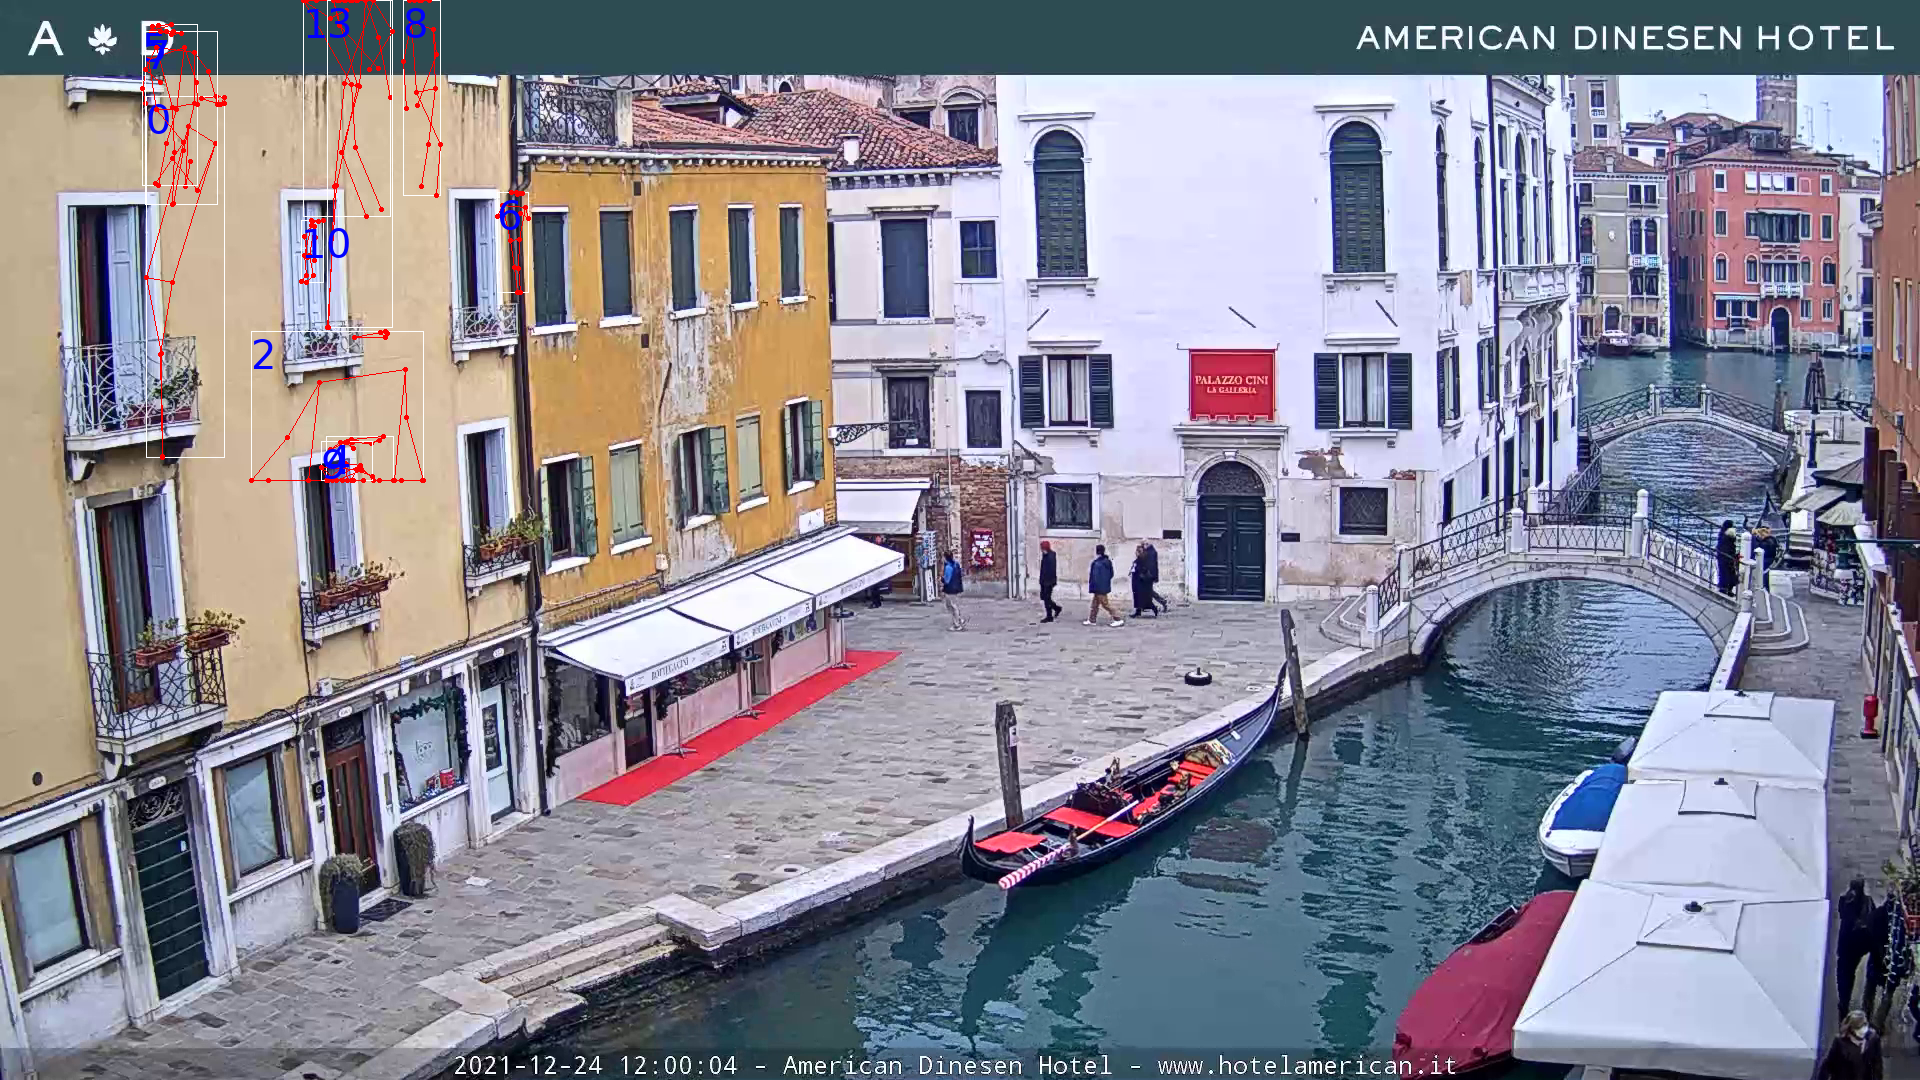

In [15]:
_image_tool = PoseImageTool(filename=_images_path + '/' + _image_filename)   

for index,_pose in enumerate(_poses):
     add_pose_to_image(_image_tool,_pose,index)
        
_image_tool.image        

0 2 5 ((320, 900), (479, 1079))
1 11 5 ((1760, 900), (1919, 1079))
2 11 4 ((1760, 720), (1919, 899))
3 7 3 ((1120, 540), (1279, 719))
4 6 3 ((960, 540), (1119, 719))
5 5 3 ((800, 540), (959, 719))
6 8 2 ((1280, 360), (1439, 539))
7 0 0 ((0, 0), (159, 179))


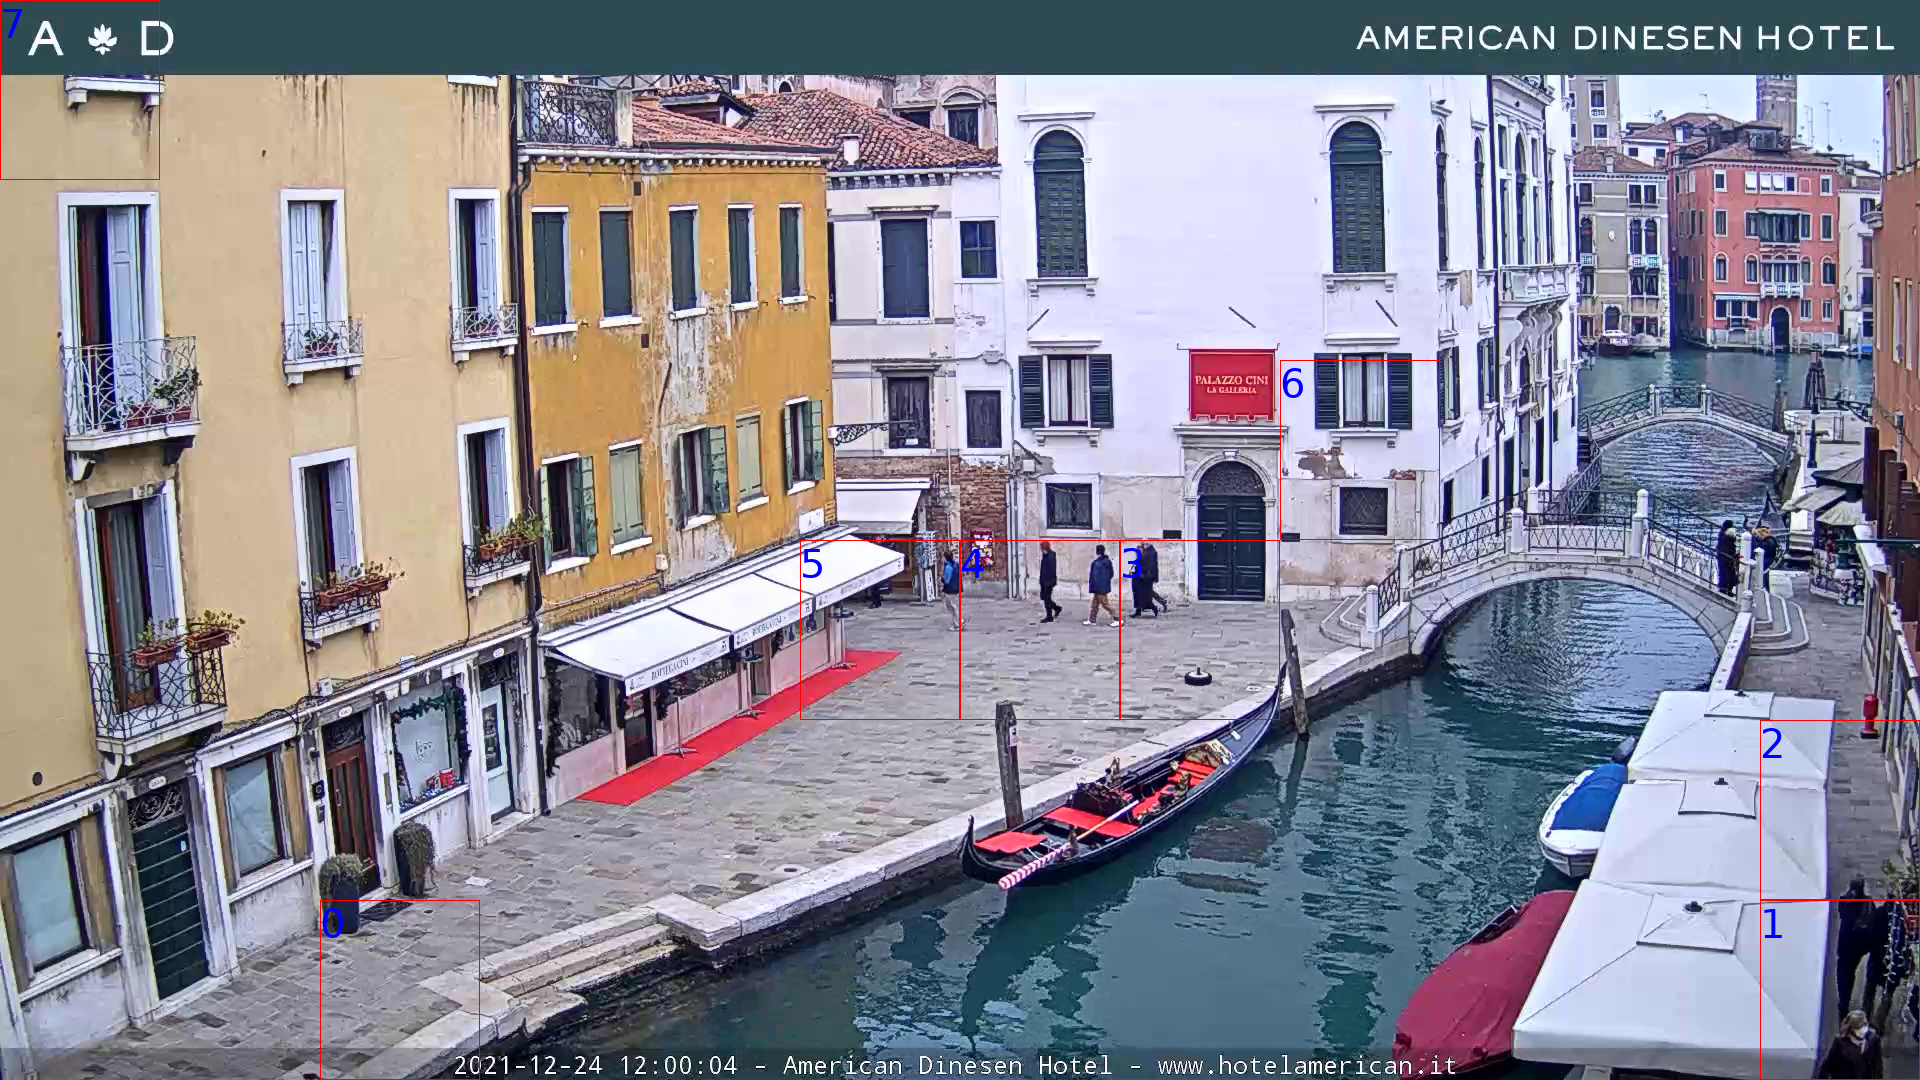

In [16]:
#_image_filename = _image_filenames[3]
_image_tool = PoseImageTool(filename=_image_path) 
_filenames = _pose_filenames_timestamp

for index,_filename in enumerate(_filenames):
    bbox = box_to_bbox_world(_filename.x,_filename.y)
    _image_tool.drawBBox(bbox,color='red')
    print (index,_filename.x,_filename.y,bbox)
    x=bbox[0][0]
    y=bbox[0][1]
    fontsize=40
    _image_tool.drawText(str(index), x,y,fontsize, color='blue')
_image_tool.image           

In [17]:
_image_tool.image.size
_image_filenames

_filename = _filenames[2]
_poses=get_poses_for_filename(_poses_path,_filename)
_filename.__dict__, _poses

({'time_seconds': 1640343624.0894485,
  'y': 4,
  'x': 11,
  'key': 'JqUREqYduHw',
  '_filename': 'JqUREqYduHw_Box_4_11_1640343624.0894485_Dec-24-12:00:24-2021.json'},
 [<ipynb.fs.full.box_tool.PoseBox at 0x7f8fb9625eb0>])

In [18]:
641_481
_poses[0].__dict__

{'size': (1920, 1080),
 'min': (1760, 720),
 'max': (1919, 899),
 'score_range': [0.0024152615, 0.84752554],
 'time_seconds': 1644080414.5751567,
 'bbox': [[326, 436], [393, 480]],
 'pose': Pose({'nose': Keypoint(<nose>, (371.4253, 443.28766), 0.08664355427026749), 'left eye': Keypoint(<left eye>, (351.1689, 439.85718), 0.1088028997182846), 'right eye': Keypoint(<right eye>, (383.34406, 436.85223), 0.06831639260053635), 'left ear': Keypoint(<left ear>, (352.87527, 442.06772), 0.7723419070243835), 'right ear': Keypoint(<right ear>, (379.16827, 440.68613), 0.7346435189247131), 'left shoulder': Keypoint(<left shoulder>, (345.02924, 463.3232), 0.8475255370140076), 'right shoulder': Keypoint(<right shoulder>, (360.52878, 465.40045), 0.6918307542800903), 'left elbow': Keypoint(<left elbow>, (327.57904, 480.0), 0.3880002796649933), 'right elbow': Keypoint(<right elbow>, (326.58823, 480.0), 0.23568733036518097), 'left wrist': Keypoint(<left wrist>, (332.57532, 480.0), 0.31584644317626953), 'ri

## Try with app 

In [19]:
_app_test = SimpleApplicationWidget(filename = '_EasyVideoPipeLine_641_481.json')

Output()

<Task pending name='test' coro=<HaltableActionExecutor.my_code() running at /home/jovyan/work/data3/scray/projects/edge/coral/actions/video_actions_v2.ipynb:1409>>


In [20]:
_video_path= '../data/images/box_bookmarks_6_12/images_'+ _key+'.json'
loadVideo(app=_app_test,key='/home/jovyan/test/'+_key,filename=_video_path,index=5)
_app_test._tab._widgets[1].crop_list.value='Box_3_6'

../data/images/box_bookmarks_6_12/images_JqUREqYduHw.json

<class 'ipynb.fs.full.video_actions_v2.ImageAction'> action
on_video_load_button_clicked:../data/images/box_bookmarks_6_12/images_JqUREqYduHw.json


In [21]:
# get next image, evaluate pipeline
result=_app_test._tab.evaluateWidgetActionList(end=None)

JqUREqYduHw_5_1640343660.6266232_Dec-24-11:01:00-2021_.png position= 1 time_seconds= 1640343660.6266232 poses= 2


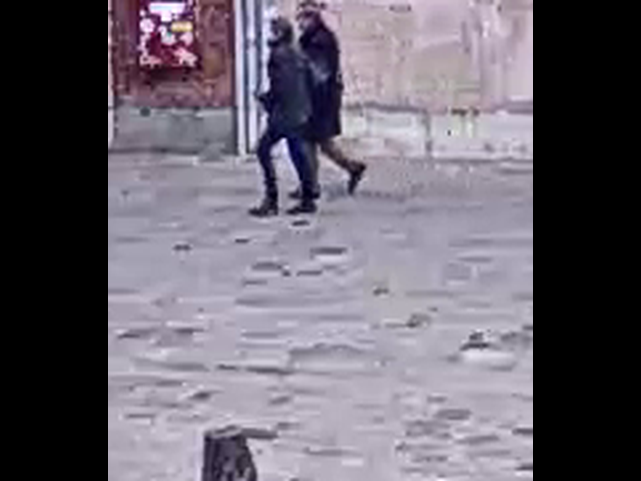

In [22]:
# get timestamp,x,y,poses for selected region

_video = _app_test._tab._widgets[0]
_files= sorted(listdir(_video.action.directory))
_filename =  _files[_video.action.position]
_image_path = _images_path + '/' + _filename
_splits = _filename.split('_') 

_time_seconds = float(_splits[len(_splits)-3])
_y = int(_app_test._tab._widgets[1].crop_list.value.split('_')[1])
_x = int(_app_test._tab._widgets[1].crop_list.value.split('_')[2])

_pose_filenames_timestamp   = filter_filenames(list=_pose_filenames,  time_seconds=_time_seconds)
_poses = []
for _name in _pose_filenames_timestamp:
    if int(_name.x) == int(_x) and int(_name.y) == int(_y):
        _pose_filename = _name
        _poses = get_poses_for_filename(_poses_path,_pose_filename)
        break

print(_filename,'position=',_video.action.position,'time_seconds=',_time_seconds,'poses=',len(_poses))        
result['image']

In [23]:
_app_test._tab._widgets[2].action.black_area_size(image=Image.open(open(_image_path, 'rb')))

(0, 121)

In [ ]:
_image_tool = PoseImageTool(image=result['image'].copy())
#_image_tool = PoseImageTool(image=ImageOps.mirror(_app_test._tab.imageWidget.getImage()))
for index,_pose in enumerate(_poses):
     add_pose_to_image(_image_tool,_pose,index)

_image_tool.image

In [ ]:
#Image.open(open(_image_path, 'rb'))

_image_tool = PoseImageTool(filename=_image_path) 
_filenames = _pose_filenames_timestamp

for index,_filename in enumerate(_filenames):
    bbox = box_to_bbox_world(_filename.x,_filename.y)
    _image_tool.drawBBox(bbox,color='red')
    #print (index,_filename.x,_filename.y,bbox)
    fontsize=40
    _image_tool.drawText(str(index), bbox[0][0],bbox[0][1],fontsize, color='blue')
    _image_tool.drawText(str(_filename.y) + '_' + str(_filename.x), bbox[0][0],bbox[1][1]-50,fontsize, color='blue')
_image_tool.image        

In [ ]:
#from PIL import ImageOps
#ImageOps.mirror(_app_test._tab.imageWidget.getImage())